<a href="https://colab.research.google.com/github/KaioLopesS/titanic_classification/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.isnull().sum()/train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
import plotly.express as px
px.box(train, x = 'Age', color = 'Survived')

In [ ]:
px.box(train, x = 'Fare', color = 'Survived')

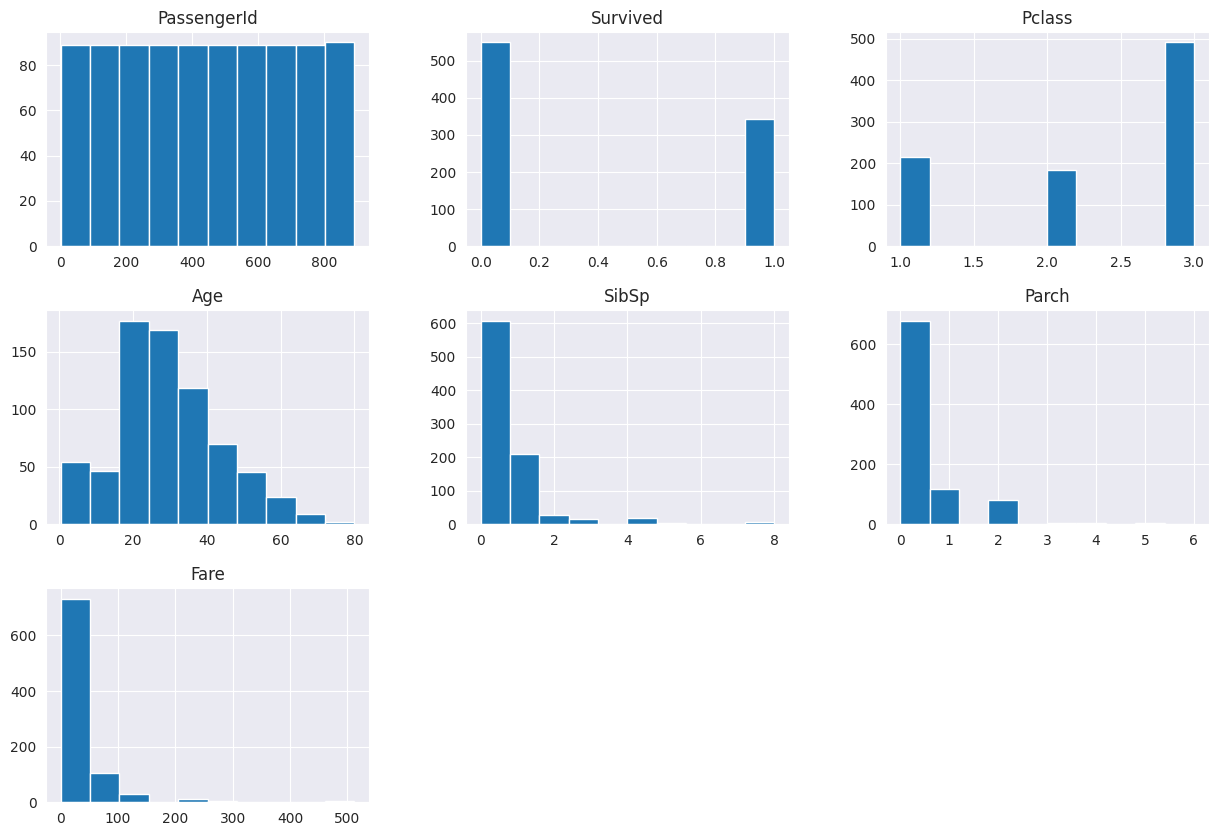

In [ ]:
sns.set_style('darkgrid')
train.hist(figsize=(15,10))
plt.show()

In [ ]:
y = train['Survived']
x = train.drop(['Survived', 'PassengerId', 'Name', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Fare', 'Parch' ], axis=1)

# **Manipulando os dados de treino**

In [ ]:
x.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
colunas = x.columns

In [ ]:
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'),
    ['Sex']
), remainder='passthrough', sparse_threshold=0)

In [ ]:
x = one_hot.fit_transform(x)

In [ ]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__Sex_male', 'remainder__Pclass', 'remainder__Age'],
      dtype=object)

In [ ]:
x =pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas) )
x

,onehotencoder__Sex_male,remainder__Pclass,remainder__Age
0,1.0,3.0,22.0
1,0.0,1.0,38.0
2,0.0,3.0,26.0
3,0.0,1.0,35.0
4,1.0,3.0,35.0
...,...,...,...
886,1.0,2.0,27.0
887,0.0,1.0,19.0
888,0.0,3.0,NaN
889,1.0,1.0,26.0


In [ ]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
x = pd.DataFrame(my_imputer.fit_transform(x))
x.columns = colunas


In [ ]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

# **Manipulando os dados para previsão**

In [ ]:
x_teste_final = test[['Pclass','Sex', 'Age']]

In [ ]:
x_teste_final = one_hot.fit_transform(x_teste_final)

In [ ]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__Sex_male', 'remainder__Pclass', 'remainder__Age'],
      dtype=object)

In [ ]:
x_teste_final = pd.DataFrame(x_teste_final, columns = one_hot.get_feature_names_out(colunas))

In [ ]:
x_teste_final.isnull().sum()

onehotencoder__Sex_male     0
remainder__Pclass           0
remainder__Age             86
dtype: int64

In [ ]:
my_imputer2 = SimpleImputer()
x_teste_final = pd.DataFrame(my_imputer2.fit_transform(x_teste_final))
x_teste_final.columns = colunas

In [ ]:
x_teste_final.isnull().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

# Dividindo os dados de treino

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 27)

# Random *Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state = 27, max_depth = 10)

In [ ]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=27)

In [ ]:
y_previsto = random_forest.predict(x_test)

In [ ]:
x_teste_final.shape

(418, 3)

In [ ]:
x.shape

(891, 3)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Accuracy: {} %'.format((accuracy_score(y_previsto, y_test)*100).round(2)))

Accuracy: 81.34 %


# Fazendo previsão com o modelo Random Forest

In [ ]:
x_teste_final

,Pclass,Sex,Age
0,1.0,3.0,34.50000
1,0.0,3.0,47.00000
2,1.0,2.0,62.00000
3,1.0,3.0,27.00000
4,0.0,3.0,22.00000
...,...,...,...
413,1.0,3.0,30.27259
414,0.0,1.0,39.00000
415,1.0,3.0,38.50000
416,1.0,3.0,30.27259


In [ ]:
predict = random_forest.predict(x_teste_final)
predict

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
predict1 = random_forest.predict(x_teste_final[2:3])
if predict1 == 0:
  print('This person not survived')
else:
  print('This person survived')

This person survived


In [ ]:
import joblib
import os

random_forest.fit(x, y)
joblib.dump(random_forest, os.path.join('/content/titanic', 'random_forest.pkl'))

['/content/titanic/random_forest.pkl']